# **Выполнение задания: "Центральная предельная теорема своими руками".**
### *В качестве исследуемого распределения было выбрано распределение Лапласа с параметрами $\alpha=1.5$ и $\beta = 0$.*

Импортируем библиотеки, необходимые для работы.

In [147]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math 
%matplotlib inline

## Построение гистограммы выборки из распределения Лапласа и его функции плотности.

Сгенерируем выборку размера $n = 1000$.

In [130]:
N = 1000
n = 1000
beta = 0.
alpha = 1.5
gamma_rv = sts.laplace(loc=beta, scale=1/alpha)
sample = gamma_rv.rvs(size = n)

Построим график плотности данного распределения и гистограмму полученной выборки.

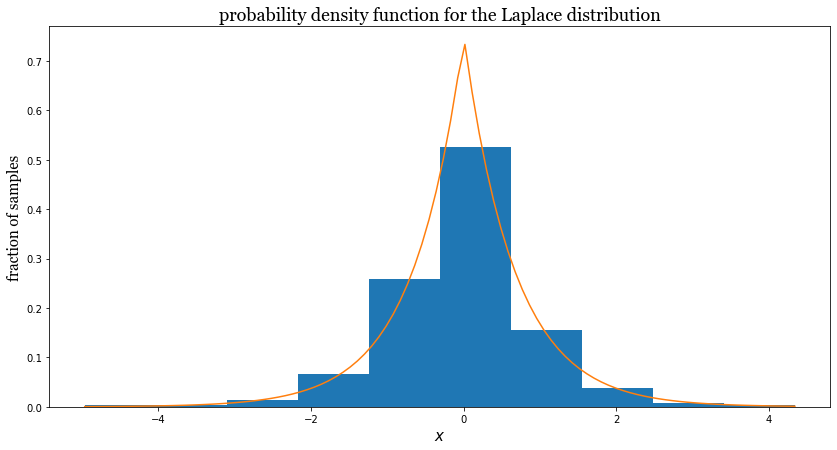

In [148]:
x = np.linspace(min(sample), max(sample), 100)
pdf = gamma_rv.pdf(x)
plt.figure(figsize=(14,7))
plt.ylabel('fraction of samples', fontsize=15, fontname='Georgia')
plt.xlabel('$x$', fontsize=15, fontname='Georgia')
plt.title('probability density function for the Laplace distribution', fontsize=18, fontname='Georgia')
plt.hist(sample, density=True) #параметр normed нынче deprecated, поэтому density
plt.plot(x, pdf)
plt.show()

## Оценка распределения выборочного среднего исследуемой случайной величины при разных объёмах выборок.

Мы знаем, что $X_n \sim N\left(EX, \frac{DX}{n}\right)$, где $n$ - размер выборки. Матожидание и плотность распределения Лапласа имеют вид: $EX = \beta$, $DX = \frac{2}{\alpha^2}$.

Сгенерируем $N = 1000$ выборок размера n = 2, построим гистограмму распределения их выборочных средних, а также плотность соответствующего нормального распределения.

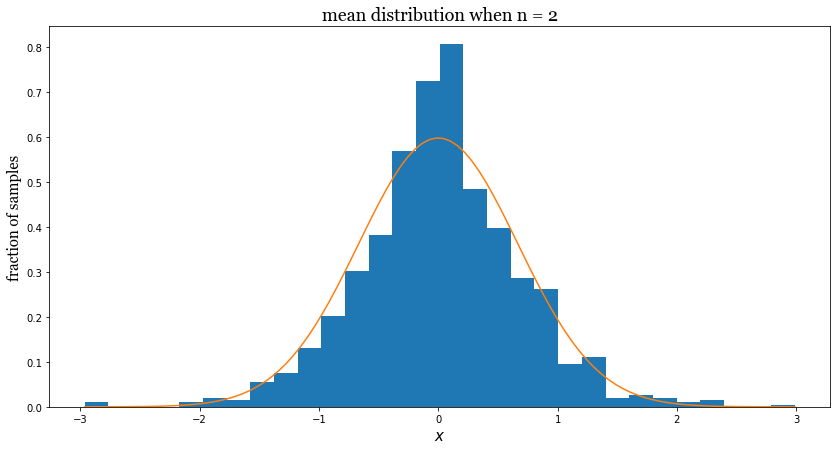

In [132]:
def generateApproximationOfMean(n):
    
    means = []
    
    #генерируем выборки
    for i in range(N):
        sample = gamma_rv.rvs(size = n)
        means.append(sample.mean())
        
    #задаем нормально распределенную случайную величину с требуемыми параметрами
    norm_rv = sts.norm(beta, math.sqrt(2./(n*alpha**2)))
    
    #строим график
    plt.figure(figsize=(14,7))
    plt.hist(means, bins=30, density=True)
    x = np.linspace(min(means), max(means), 100)
    plt.ylabel('fraction of samples', fontsize=15, fontname='Georgia')
    plt.xlabel('$x$', fontsize=15, fontname='Georgia')
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf)
    plt.title('mean distribution when n = %i' %n,  fontsize=18, fontname='Georgia')
    plt.show()

generateApproximationOfMean(2)

Повторим это действие для $N = 1000$ выборок размера n = 10.

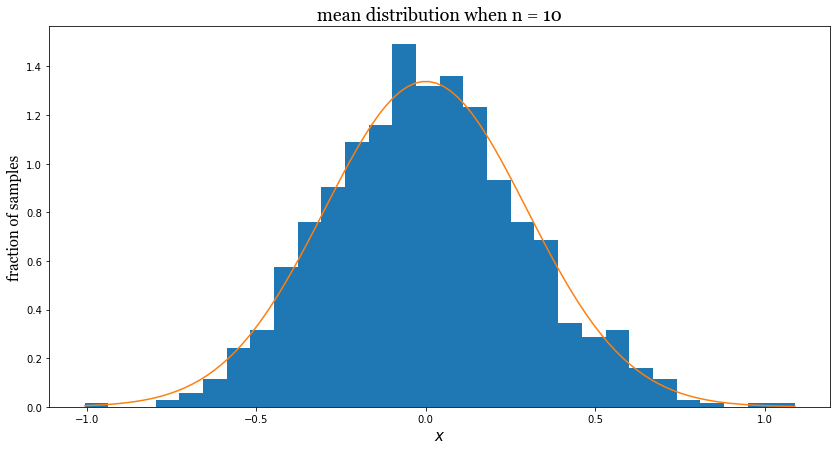

In [133]:
generateApproximationOfMean(10)

Повторим это действие для $N = 1000$ выборок размера n = 50.

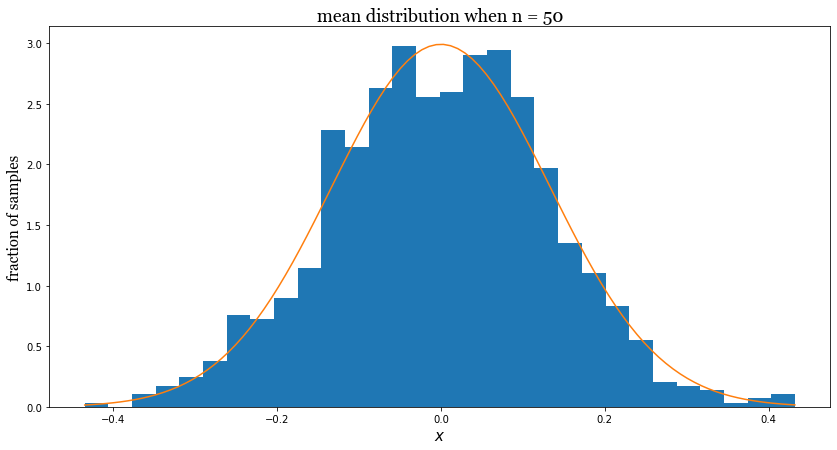

In [145]:
generateApproximationOfMean(50)

Повторим это действие для $N = 1000$ выборок размера n = 500.

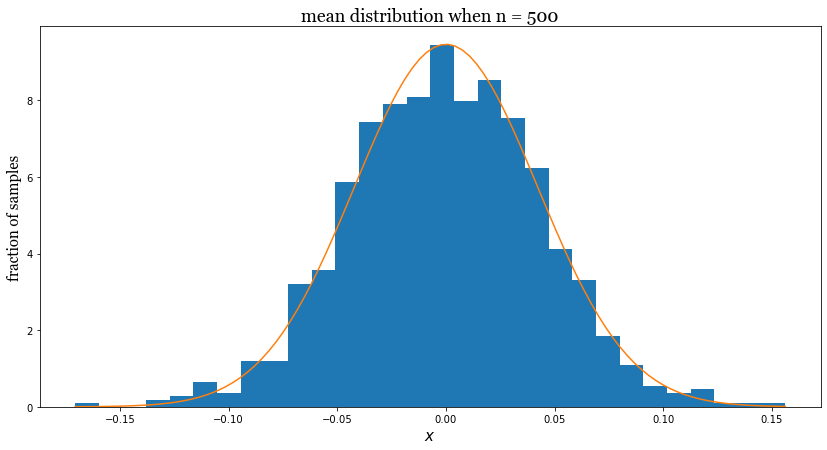

In [137]:
generateApproximationOfMean(500)

$\textbf{Выводы:}$ видим, что при увеличении размера выборок распределение выборочных средних стремится к нормальному и точность нормальной аппроксимации повышается: гистограмма становится более "пологой" по краям, не вылезает так сильно за пик нормального распределения, как при небольших $n$. В идеале она должна становиться более симметричной, но по этим графикам трудно это заметить. (Однако, при достаточно больших $n$ повышение точности уже не кажется значительным, так что можно брать выборки разумных размеров, не требующих много времени на обработку).